In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")

In [2]:
keras.__version__

'2.4.0'

In [3]:
tf.__version__

'2.4.1'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


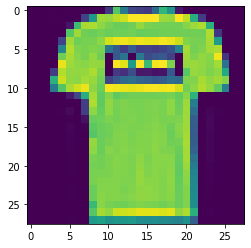

In [5]:
plt.imshow(X_train[1])

In [6]:
y_train[1]

0

In [7]:
class_name = ['T-shirt/top','Trouser','Pollover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankie boot']

In [8]:
class_name[y_train[1]]

'T-shirt/top'

In [9]:
#28*28 pixels
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [10]:
X_train.shape

(60000, 28, 28)

## Data Normalization

In [11]:
X_train = X_train/255.
X_test = X_test/255.

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Split the data into train/validation/test datasets
### **Training data**- *used for training the model*
### **Validation data**- *used for tunning hyperparameters and evaluate the models*
### **Test data**- *used to test model after the model has gone through initial vetting by the validation set*

In [13]:
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test

In [14]:
print(X_valid.shape, X_train.shape)
print(y_valid.shape, y_train.shape)
print(X_test.shape)

(5000, 28, 28) (55000, 28, 28)
(5000,) (55000,)
(10000, 28, 28)


## Building ANN

In [15]:
np.random.seed(8)
tf.random.set_seed(8)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


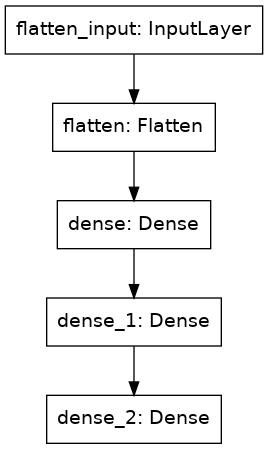

In [18]:
import pydot
keras.utils.plot_model(model)

In [19]:
weights, biases = model.layers[1].get_weights()

In [20]:
weights

array([[-0.0200219 , -0.02410354,  0.01316736, ...,  0.04453796,
         0.00408433, -0.02619528],
       [-0.00573499,  0.06214768,  0.00462509, ..., -0.06964923,
         0.01192172,  0.04703412],
       [ 0.05948581, -0.01085071,  0.05307224, ..., -0.04816551,
         0.05163905,  0.02916326],
       ...,
       [-0.00528286, -0.03861406, -0.05274184, ..., -0.05917013,
        -0.04368628, -0.01122028],
       [ 0.03186272, -0.04622478, -0.0600584 , ..., -0.07175218,
        -0.07067926, -0.06700397],
       [-0.02890768, -0.0527467 , -0.05173495, ...,  0.0513411 ,
         0.00727268,  0.0660702 ]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

## Compiling the Model

In [24]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [25]:
model_history = model.fit(X_train, y_train, epochs=60,
                         validation_data=(X_valid, y_valid))

Epoch 1/60
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9780 - accuracy: 0.6853 - val_loss: 0.5688 - val_accuracy: 0.7872
Epoch 2/60
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4995 - accuracy: 0.8268 - val_loss: 0.4540 - val_accuracy: 0.8452
Epoch 3/60
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4470 - accuracy: 0.8426 - val_loss: 0.4117 - val_accuracy: 0.8588
Epoch 4/60
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4194 - accuracy: 0.8524 - val_loss: 0.4089 - val_accuracy: 0.8546
Epoch 5/60
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3929 - accuracy: 0.8610 - val_loss: 0.3836 - val_accuracy: 0.8660
Epoch 6/60
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3837 - accuracy: 0.8676 - val_loss: 0.3737 - val_accuracy: 0.8736
Epoch 7/60
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3646 - accuracy: 0.8726 - val_loss: 0.3664 - val_accuracy:

In [26]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1719}

In [27]:
model_history.history

{'loss': [0.7107754349708557,
  0.48717716336250305,
  0.44144874811172485,
  0.4146351218223572,
  0.39255619049072266,
  0.3783341348171234,
  0.36409103870391846,
  0.353121817111969,
  0.3423921465873718,
  0.3329758942127228,
  0.3256279230117798,
  0.3170083463191986,
  0.31010228395462036,
  0.3036123812198639,
  0.2964569330215454,
  0.291044682264328,
  0.2843381464481354,
  0.28032317757606506,
  0.27430036664009094,
  0.26922181248664856,
  0.2645220458507538,
  0.2586219608783722,
  0.25564542412757874,
  0.25123220682144165,
  0.24692294001579285,
  0.24239838123321533,
  0.23858629167079926,
  0.2341226488351822,
  0.2312811017036438,
  0.22679753601551056,
  0.22308087348937988,
  0.2202776074409485,
  0.21714185178279877,
  0.2134074866771698,
  0.21078968048095703,
  0.20699328184127808,
  0.203754261136055,
  0.20085503160953522,
  0.19719524681568146,
  0.1953783929347992,
  0.19273638725280762,
  0.18944135308265686,
  0.18611553311347961,
  0.18348640203475952,
  0

## Ploting Accuracy

(0.0, 1.0)

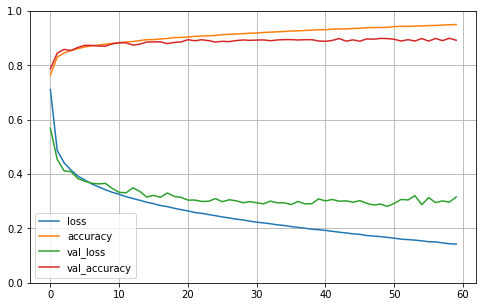

In [28]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

## Evaluating Model

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3408 - accuracy: 0.8850


[0.3407628536224365, 0.8849999904632568]

In [30]:
X_new = X_test[:3]

In [31]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.87, 0.  , 0.13, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
y_pred  = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [33]:
np.array(class_name)[y_pred]

array(['Ankie boot', 'Pollover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


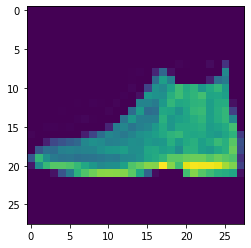

In [34]:
print(plt.imshow(X_new[0]))

AxesImage(54,36;334.8x217.44)


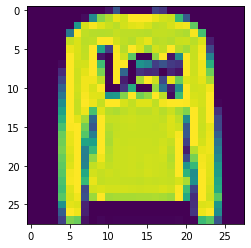

In [35]:
print(plt.imshow(X_new[1]))

AxesImage(54,36;334.8x217.44)


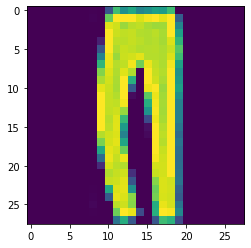

In [36]:
print(plt.imshow(X_new[2]))